In [18]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('final.csv')


In [3]:
data.shape

(1000, 17)

In [4]:
#label encoding the parameters
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
data['Passwords'] = number.fit_transform(data['Passwords'].astype('str'))

In [5]:
# Dropping the unnecessary columns
X=data.drop(['Password_Strength','Unnamed: 0','Score','Has_Word','Has_Name','Has_Place'],axis=1)
Y=data.Password_Strength

In [6]:
#splitting into traing and testing sets
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

### Randomised Search for SVM hyper paramenters

In [7]:
C = [.0001, .001, .01]
gamma = [.0001, .001, .01, .1, 1, 10, 100]
degree = [1, 2, 3, 4, 5]
kernel = ['linear', 'rbf', 'poly']
probability = [True]
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

print(random_grid)



{'C': [0.0001, 0.001, 0.01], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5], 'probability': [True]}


In [8]:
svc = svm.SVC(random_state=8,cache_size=7000)
random_search_values = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

random_search_values.fit(xtrain, ytrain)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.3s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=8,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'C': [0.0001, 0.001, 0.01], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5], 'probability': [True]},
          pre_dispatch='2*n_jobs', random_state=8, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

In [9]:
print("The best hyperparameters for SVM from Randomised search are:")
print(random_search_values.best_params_)
print("")
print("The mean accuracy of a model with the hyperparameters obtained from randomised search is:")
print(random_search_values.best_score_)

The best hyperparameters from Grid Search are:
{'probability': True, 'kernel': 'poly', 'gamma': 0.001, 'degree': 4, 'C': 0.01}

The mean accuracy of a model with these hyperparameters is:
0.9885714285714285


### Grid serach for SVM hyperparameters

In [10]:
# Create the parameter grid based on the results of random search 
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

svc = svm.SVC(random_state=8)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)
grid_search_values = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)
grid_search_values.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    6.3s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=8,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['linear'], 'probability': [True]}, {'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['poly'], 'degree': [3, 4, 5], 'probability': [True]}, {'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['rbf'], 'gamma': [1, 10, 100], 'probability': [True]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [11]:
print("The best hyperparameters for SVM from Grid Search are:")
print(grid_search_values.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters from grid search is:")
print(grid_search_values.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.0001, 'kernel': 'linear', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
0.98989898989899


### SVM Without tuning parameters

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear',random_state=42)
clf.fit(xtrain,ytrain)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

### Accuracy

In [13]:
from sklearn.metrics import accuracy_score

print('Accuracy for randomizedsearch: ', 100 * accuracy_score(ytest, random_search_values.predict(xtest)), '%')
print('Accuracy for gridsearch: ', 100 * accuracy_score(ytest, grid_search_values.predict(xtest)), '%')
print('Accuracy without hyper parameter tuning: ', 100 * accuracy_score(ytest, clf.predict(xtest)), '%')

Accuracy for randomizedsearch:  98.33333333333333 %
Accuracy for gridsearch:  98.33333333333333 %
Accuracy without hyper parameter tuning:  98.33333333333333 %


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(ytest, random_search_values.predict(xtest))
print(results)

[[  0   5]
 [  0 295]]


### Classification report for randomised search

In [ ]:
print("Classification report for randomised search")
print(classification_report(ytest, random_search_values.predict(xtest)))

### Confusion matrix using randomised search

Text(0.5, 159.0, 'truth')

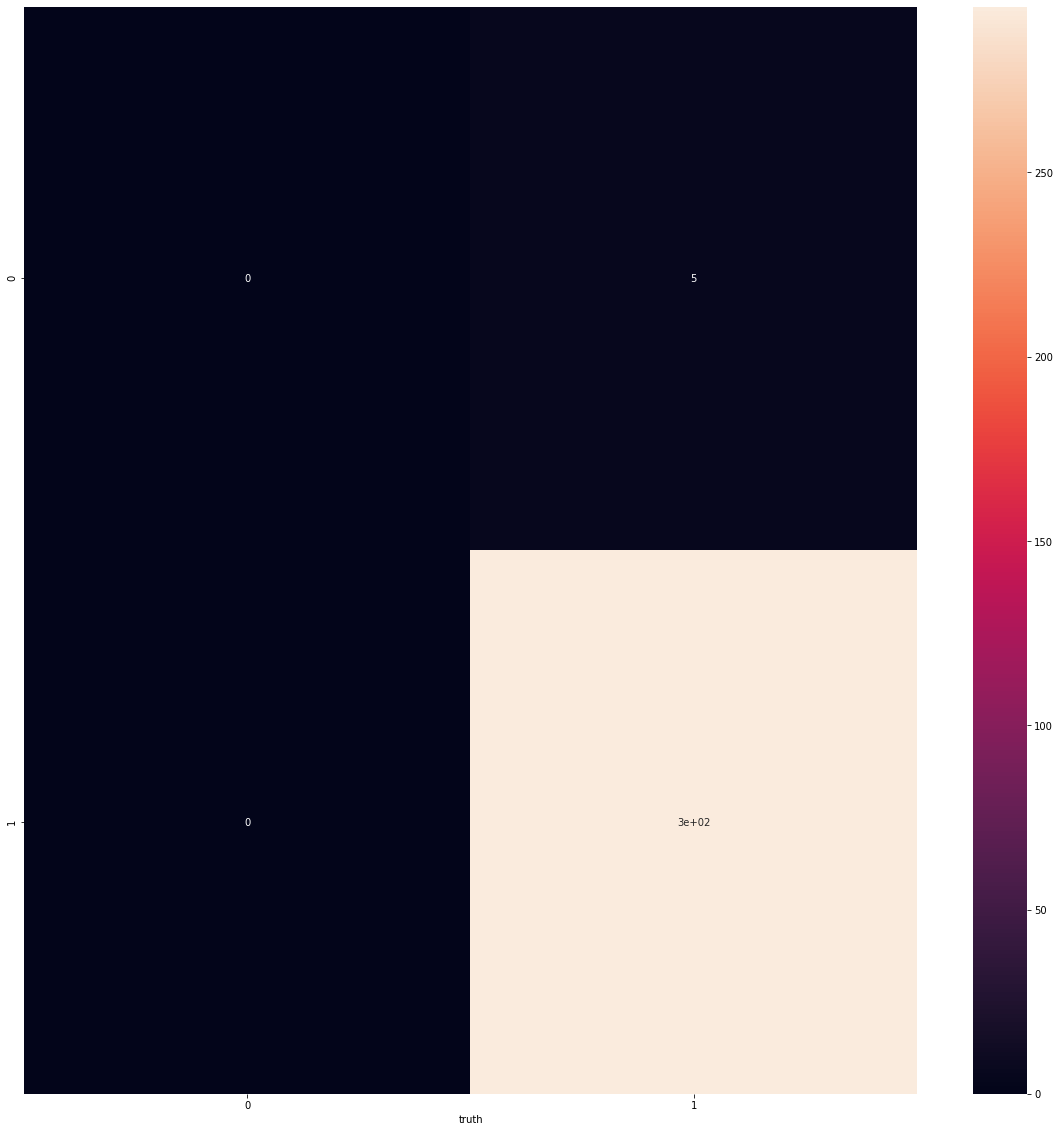

In [19]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True,fmt="d",
            xticklabels=aux_df['Password_Source'].values, 
            yticklabels=aux_df['Password_Source'].values,
            cmap="Blues")
plt.xlabel('Predicted')
plt.xlabel('truth')

In [20]:
results = confusion_matrix(ytest, grid_search_values.predict(xtest))
print(results)

[[  0   5]
 [  0 295]]


### Classification report for grid search

In [ ]:
print("Classification report for grid search")
print(classification_report(ytest, grid_search_values.predict(xtest)))

### Confusion matrix when gris search

Text(0.5, 159.0, 'truth')

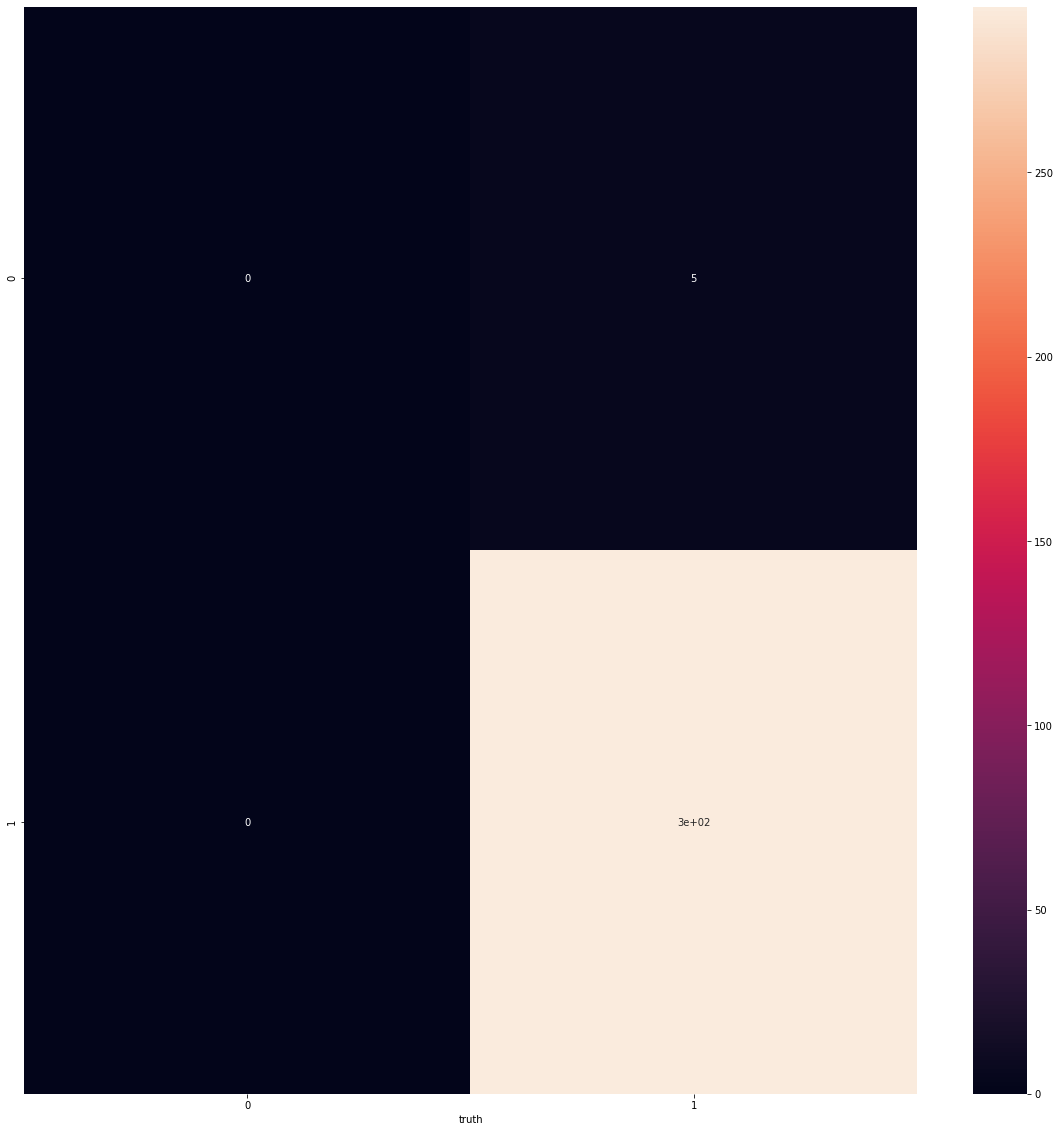

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True,fmt="d",
            xticklabels=aux_df['Password_Source'].values, 
            yticklabels=aux_df['Password_Source'].values,
            cmap="Blues")
plt.xlabel('Predicted')
plt.xlabel('truth')

In [22]:
results = confusion_matrix(ytest, clf.predict(xtest))
print(results)

[[  0   5]
 [  0 295]]


### Classification report without tuning

In [ ]:
print("Classification report without tuning")
print(classification_report(ytest, clf.predict(xtest)))

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True,fmt="d",
            xticklabels=aux_df['Password_Source'].values, 
            yticklabels=aux_df['Password_Source'].values,
            cmap="Blues")
plt.xlabel('Predicted')
plt.xlabel('truth')